In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2
import torch
import torch.utils.data
from PIL import Image

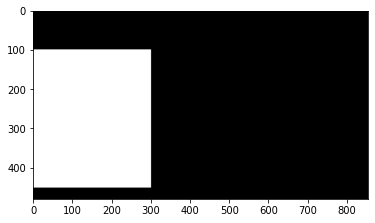

In [11]:
dir_list = os.listdir(r"D:\Machine_Learning\maskrcnn_pytorch\data\Motogp\images")

for filename in dir_list:
    image = Image.open('D:\Machine_Learning\maskrcnn_pytorch\data\Motogp\images\\'+filename)
    image = np.array(image)
    mask = np.zeros(image.shape[:2], dtype="uint8")


    cv2.rectangle(mask, (0, 100), (300, 450), 255, -1)
    plt.imshow(mask,cmap="gray")
    break


In [9]:
import json
# Open Anotation
with open(r'D:\Machine_Learning\maskrcnn_pytorch\data\Motogp\dl_motogp2.json', 'r') as f:
  data = json.load(f)

for idx,filename in enumerate(data['_via_img_metadata']):
    image = cv2.imread(r"D:\Machine_Learning\maskrcnn_pytorch\data\Motogp\images\\"+data['_via_img_metadata'][filename]['filename'])
    
    #Create folder
    parent_dir = r"D:\Machine_Learning\maskrcnn_pytorch\data\Motogp\mask"
    path = os.path.join(parent_dir,data['_via_img_metadata'][filename]['filename'][:-4])
    try:
        os.makedirs(path, exist_ok = True)
        # print("Directory '%s' created successfully" % directory)
    except OSError as error:
        print("Directory '%s' can not be created" % path)

    
    for idx_,bbox in enumerate(data['_via_img_metadata'][filename]['regions']):
      all_points_x = bbox['shape_attributes']['all_points_x']
      all_points_y = bbox['shape_attributes']['all_points_y']
      points = np.array(list(zip(all_points_x, all_points_y)))
      
      labels = bbox['region_attributes']['class']
      mask = np.zeros(image.shape[:2], dtype="uint8")
      cv2.fillPoly(mask, pts=[points],color=(255, 255, 255))
      #Save image to folder class
      #Crate folder class
      path = os.path.join(parent_dir,data['_via_img_metadata'][filename]['filename'][:-4],"class_"+str(int(labels)+1))
      try:
          os.makedirs(path, exist_ok = True)
          # print("Directory '%s' created successfully" % directory)
          cv2.imwrite(path+"\\"+str(idx_)+"_"+data['_via_img_metadata'][filename]['filename'], mask)
      except OSError as error:
          print("Directory '%s' can not be created" % path)

      
    # plt.imshow(mask,cmap="gray")  
    # break



In [6]:
cv2.fillPoly(mask, pts=[points],color=(255, 255, 255))

(480, 854)

In [4]:
np.unique(mask)

array([  0, 255], dtype=uint8)